In [2]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report



In [3]:
#load data
df = pd.read_excel(r"C:\Users\shravani\Downloads\insta_activity_first_1500.xlsx")
print(df.shape)

(1500, 19)


In [4]:
#target variables

y_reg = df["user_engagement_score"]
X = df.drop(columns=["user_engagement_score"])

threshold = y_reg.quantile(0.75)
df["high_engagement_user"] = (y_reg >= threshold).astype(int)

y_clf = df["high_engagement_user"]

In [5]:
#preprocessing

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

In [6]:
#random forest regression

X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

rf_model = Pipeline([
    ("prep", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=300,
        max_depth=25,
        min_samples_split=4,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9559221907781271
MAE: 0.16988681211693166


In [7]:
#regression predictions

reg_predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

reg_predictions.head(10)

,Actual,Predicted
0,1.09,0.990806
1,5.50,7.162902
2,1.06,1.044293
3,1.46,1.396753
4,1.34,1.227464
5,1.04,1.035242
6,1.10,1.055978
7,1.09,1.026917
8,1.91,1.934469
9,0.97,1.087193


In [8]:
#logistic regression

X_clf = df.drop(columns=["user_engagement_score", "high_engagement_user"])

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, stratify=y_clf, random_state=42
)

log_model = Pipeline([
    ("prep", preprocessor),
    ("log", LogisticRegression(max_iter=3000))
])

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       224
           1       0.84      0.83      0.83        76

    accuracy                           0.92       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.92      0.92      0.92       300



In [9]:
#classification predictions

clf_predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

clf_predictions.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


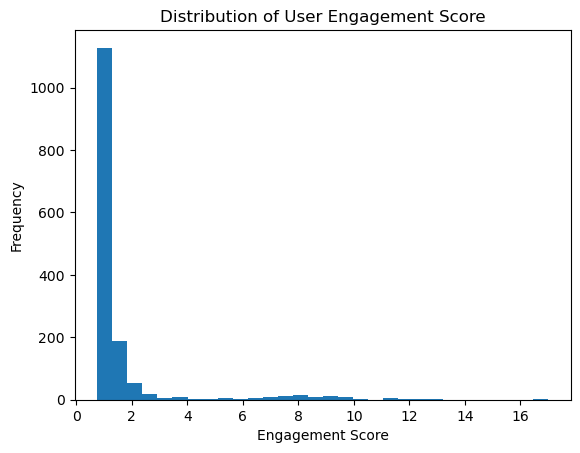

In [11]:
#engagement score distribution

import matplotlib.pyplot as plt
plt.figure()
plt.hist(df["user_engagement_score"], bins=30)
plt.title("Distribution of User Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.show()

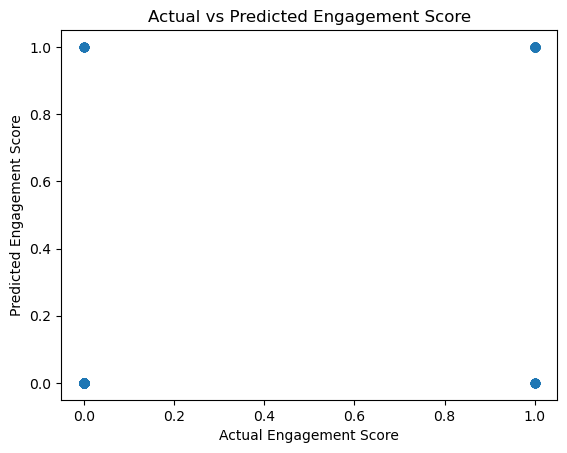

In [12]:
# GRAPH 2: Actual vs Predicted (Regression)

plt.figure()
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Engagement Score")
plt.xlabel("Actual Engagement Score")
plt.ylabel("Predicted Engagement Score")
plt.show()

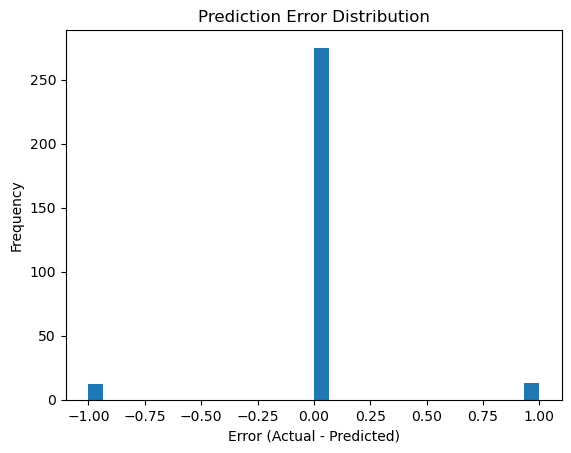

In [14]:
#GRAPH 3: Regression Error Distribution

errors = y_test - y_pred

plt.figure()
plt.hist(errors, bins=30)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

In [15]:
# LOGISTIC REGRESSION

X_clf = df.drop(columns=["user_engagement_score", "high_engagement_user"])

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, stratify=y_clf, random_state=42
)

log_model = Pipeline([
    ("prep", preprocessor),
    ("log", LogisticRegression(max_iter=3000))
])

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       224
           1       0.84      0.83      0.83        76

    accuracy                           0.92       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.92      0.92      0.92       300



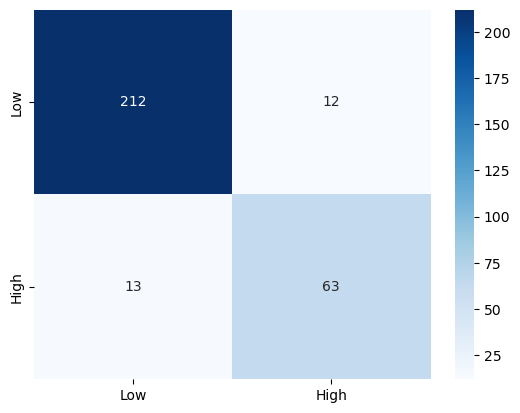

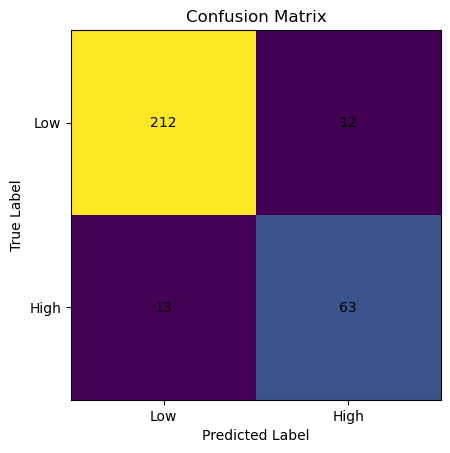

In [20]:
# GRAPH 4: Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',xticklabels=['Low','High'],yticklabels=['Low','High'])
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks([0, 1], ["Low", "High"])
plt.yticks([0, 1], ["Low", "High"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


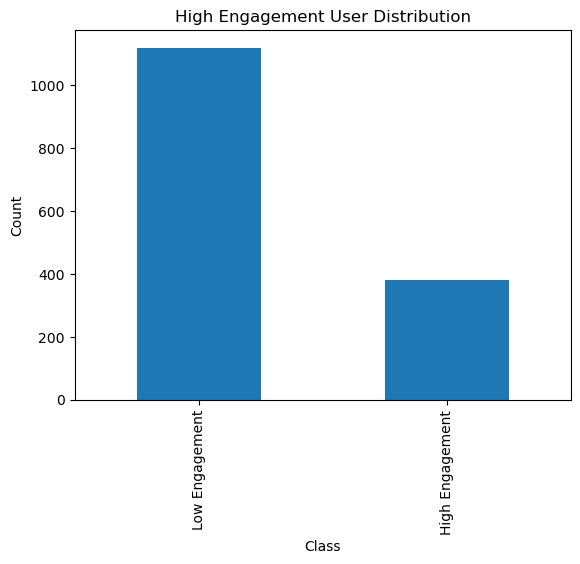

In [21]:
# GRAPH 5: High Engagement Class Distribution

plt.figure()
df["high_engagement_user"].value_counts().plot(kind="bar")
plt.title("High Engagement User Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Low Engagement", "High Engagement"])
plt.show()